# DSCI552 HW3

by Kartik Balodi  
Github Username: kartikbalodi  
USC ID: 5317465471

In [1]:
#pip install natsort

In [2]:
#pip install bootstrapped

In [3]:
import pandas as pd
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

import os
from natsort import natsorted

## Time Series Classification Part 1: Feature Creation/Extraction
  
**An interesting task in machine learning is classification of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network.**  

**(a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29**  
  
- **The dataset contains 7 folders that represent seven types of activities.** 
- **In each folder, there are multiple files each of which represents an instant of a human performing an activity. (Some of the data files need very minor cleaning. You can do it by Excel or Python.)** 
- **Each file containis 6 time series collected from activities of the same person, which are called avg rss12, var rss12, avg rss13, var rss13, vg rss23, and ar rss23.** 
- **There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.**

**(b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.**

In [4]:
relative_path = "../data/AReM/"
abs_path = os.path.abspath(relative_path)
abs_path = abs_path.replace('\\','/') + '/'

folder_names = []
for i in os.listdir(abs_path):
    if i.endswith('.pdf'):
        continue
    else:
        folder_names.append(i)

folder_path = [abs_path+i+'/' for i in folder_names]

#note now we have two lists folder_names and folder_path

In [5]:
test_df_dict = {}
train_df_dict = {}
columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

for i in range(len(folder_names)):
    file_names = natsorted(os.listdir(folder_path[i]))
    #uses relative_path in the end to find file names
    file_path = [relative_path+folder_names[i]+'/'+j for j in file_names]
    #note now we have file_names and file_path, derived from folder_names[i] and folder_path[i]

    #keep datasets 1 and 2 for testing, rest for training
    if folder_names[i] == 'bending1' or folder_names[i] == 'bending2': 
        #test first
        test_df = pd.DataFrame()
        for j in range(0,2):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            test_df = pd.concat([test_df,df],axis=0)
        test_df_dict[folder_names[i]] = test_df
        
        #train next
        train_df = pd.DataFrame()
        for j in range(2,len(file_names)):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            train_df = pd.concat([train_df,df],axis=0)
        train_df_dict[folder_names[i]] = train_df
    
    
    #keep datasets 1,2 and 3 for testing, rest for training
    else: 
        #test first
        test_df = pd.DataFrame()
        for j in range(0,3):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            test_df = pd.concat([test_df,df],axis=0)
        test_df_dict[folder_names[i]] = test_df
        
        #train next
        train_df = pd.DataFrame()
        for j in range(3,len(file_names)):
#             print(file_path[j]) #used to find file_path for extra comma issue
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            train_df = pd.concat([train_df,df],axis=0)
        train_df_dict[folder_names[i]] = train_df 

In [6]:
display(train_df_dict)

{'bending1':        time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23
 0         0      42.00       0.71      21.25       0.43      30.00       0.00
 1       250      41.50       0.50      20.25       1.48      31.25       1.09
 2       500      41.50       0.50      14.25       1.92      33.00       0.00
 3       750      40.75       0.83      15.75       0.43      33.00       0.00
 4      1000      40.00       0.71      20.00       2.74      32.75       0.43
 ..      ...        ...        ...        ...        ...        ...        ...
 475  118750      44.25       0.83      16.25       1.30      24.00       0.00
 476  119000      44.00       0.71      11.00       1.00      24.00       0.00
 477  119250      44.25       0.43      10.25       1.30      22.75       0.83
 478  119500      43.75       0.43       7.33       2.87      21.50       0.50
 479  119750      44.50       0.50       3.00       1.22      21.50       0.50
 
 [2400 rows x 7 columns],
 'bending2':

In [7]:
train_df_dict['sitting'].loc[ train_df_dict['sitting']['time']==13500]['time'].describe()

count       12.0
mean     13500.0
std          0.0
min      13500.0
25%      13500.0
50%      13500.0
75%      13500.0
max      13500.0
Name: time, dtype: float64

(Note: this comment is deprecated, it was relevant until I manually added in the line with NaN values for t=13500. I am keeping this part here to walk you through how I encountered this issue in this part of the assignment)  
  
Notice here that sitting has 5759 rows, whereas there should be 5760 = 12 * 480. Upon manually checking it appears dataset8.csv has a row missing for time = 13500.  
We confirm this by checking the count for time=13500 in the cell and notice that the count is 11, whereas it should be 12

In [8]:
for name in folder_names:
    print(name)
    print("train set")
    display(train_df_dict[name].isnull().sum())
    print('test set')
    display(test_df_dict[name].isnull().sum())

bending1
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

bending2
train set


time           0
avg_rss12    480
var_rss12    480
avg_rss13    480
var_rss13    480
avg_rss23    480
var_rss23    480
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

cycling
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

lying
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

sitting
train set


time         0
avg_rss12    1
var_rss12    1
avg_rss13    1
var_rss13    1
avg_rss23    1
var_rss23    1
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

standing
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

walking
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
dtype: int64

As expected, sitting train set has one set of NaN values, which should correspond to t=13500. We will decide how to fill this by evaluating the documentation of fillna (ffill/bfill) and interpolate methods. After researching both methods, I thought it was most appropriate to use **interpolate() method to fill in the NaN value** because the time series represents movement information of an individual, so it is likely at the movement at t=13500 in such a short time interval is the average of the movement data presented in the time immediately prior t=13250 and immediately after t=13750.   
  
Another observation is that 480 values in the train set of bending2 are showing NaN values - we can trace this back to ../data/AReM/bending2/dataset4.csv , where the values are separated by space instead of by comma. This issue will be resolved by adding some code to account for this one-off scenario

##### Summary of issues in data that I encountered with corresponding solutions:  
- _../data/AReM/cycling/dataset9.csv_ - extra comma on last line, resolved by manually removing extra comma on line 485
- _../data/AReM/cycling/dataset14.csv_ - extra comma on last line, resolved by manually removing extra comma on line 485
- _../data/AReM/sitting/dataset8.csv_ - one line missing for when time=13500 (between lines 59 and 60 in the csv file), I manually inserted the line for time = 13500 in the .csv file, with the data values populated as NaN (empty commaspace in .csv). Then, I fill values using the interpolate method
- _../data/AReM/bending2/dataset4.csv_ - values separated by space instead of comma, code block added in the for loop to account for this file, since it only occurs for one file in the whole dataset

In [9]:
#repeating this cell with fixes for all the data issues caught and elaborated on above, in hw4 I will use just this 
#cell and omit some of the previous ones above since a lot of it served exploratory purposes and the data has been cleaned
#accordingly
#here I add in two new columns called 'activity' and 'sample', which will be used for multi-index/groupby calls in c(ii)

test_df_dict = {}
train_df_dict = {}
columns = ['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

for i in range(len(folder_names)):
    file_names = natsorted(os.listdir(folder_path[i]))
    #uses relative_path in the end to find file names
    file_path = [relative_path+folder_names[i]+'/'+j for j in file_names]
    #note now we have file_names and file_path, derived from folder_names[i] and folder_path[i]

    #keep datasets 1 and 2 for testing, rest for training
    if folder_names[i] == 'bending1' or folder_names[i] == 'bending2': 
        #test first
        test_df = pd.DataFrame()
        for j in range(0,2):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            df['activity'] = folder_names[i]
            df['sample'] = file_names[j].split('.csv')[0]
            test_df = pd.concat([test_df,df],axis=0)
        test_df_dict[folder_names[i]] = test_df
        
        #train next
        train_df = pd.DataFrame()
        for j in range(2,len(file_names)):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            #accounting for the one file that has whitespace as delimiter
            if file_path[j] == '../data/AReM/bending2/dataset4.csv':
                df = pd.read_csv(file_path[j],skiprows=5,header=None,delim_whitespace=True,names=columns)
            df['activity'] = folder_names[i]
            df['sample'] = file_names[j].split('.csv')[0]
            train_df = pd.concat([train_df,df],axis=0)
        train_df_dict[folder_names[i]] = train_df
    
    
    #keep datasets 1,2 and 3 for testing, rest for training
    else: 
        #test first
        test_df = pd.DataFrame()
        for j in range(0,3):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            df['activity'] = folder_names[i]
            df['sample'] = file_names[j].split('.csv')[0]
            test_df = pd.concat([test_df,df],axis=0)
        test_df_dict[folder_names[i]] = test_df
        
        #train next
        train_df = pd.DataFrame()
        for j in range(3,len(file_names)):
            df = pd.read_csv(file_path[j],skiprows=5,header=None,delimiter=',',names=columns)
            df['activity'] = folder_names[i]
            df['sample'] = file_names[j].split('.csv')[0]
            train_df = pd.concat([train_df,df],axis=0)
        train_df_dict[folder_names[i]] = train_df 
        
#accounting for the NaN valus for t=13500 from ../data/AReM/sitting/dataset8.csv
df_temp = train_df_dict['sitting']
df_temp = df_temp.interpolate()
train_df_dict['sitting'] = df_temp

In [10]:
for name in folder_names:
    print(name)
    print("train set")
    display(train_df_dict[name].isnull().sum())
    print('test set')
    display(test_df_dict[name].isnull().sum())

bending1
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

bending2
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

cycling
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

lying
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

sitting
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

standing
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

walking
train set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

test set


time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
activity     0
sample       0
dtype: int64

As desired, no more NaN values are present. Now we can piece this together into one overall test and train dataframe, with multi-indexing to separate activity and sample data corresponding to each activity.

In [11]:
train_df = pd.DataFrame()
for key in train_df_dict.keys():
    train_df = pd.concat([train_df, train_df_dict[key]],axis=0)

test_df = pd.DataFrame()
for key in test_df_dict.keys():
    test_df = pd.concat([test_df, test_df_dict[key]],axis=0)

**(c) Feature Extraction  
Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.**  
  
**i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).**

_Simple statistical features_
- Means in each of the d dimensions
- Standard deviations of the d dimensions
- Skewness, Kurtosis and Higher order moments of the d dimensions
- Maximum and Minimum values + Quantiles (including Median)  
  
_Time series analysis related features_
- The d×d−1 Cross-Correlations between each dimension and the d Auto-Correlations
- Orders of the autoregressive (AR), integrated (I) and moving average (MA) part of an estimated ARIMA model, more specifically the time lag component for AR and MA components and the degree of the delta subtraction operator the I component
- Parameters of the AR part
- Parameters of the MA part  
  
_Frequency domain related features_
- frequencies of the k peaks in amplitude in the Discrete Fourier Transforms (DFTs) for the detrended d dimensions
- k-quantiles of these DFTs  
  
Source: https://stats.stackexchange.com/questions/50807/features-for-time-series-classification

**ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly (You are welcome to experiment to see if they make a difference).**  

In [12]:
combined_df = pd.concat([test_df,train_df],axis=0).set_index(['activity','sample'])
combined_df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  \
activity sample                                                          
bending1 dataset1        0      39.25       0.43      22.75       0.43   
         dataset1      250      39.25       0.43      23.00       0.00   
         dataset1      500      39.25       0.43      23.25       0.43   
         dataset1      750      39.50       0.50      23.00       0.71   
         dataset1     1000      39.50       0.50      24.00       0.00   
...                    ...        ...        ...        ...        ...   
walking  dataset15  118750      34.50       6.18       9.00       3.56   
         dataset15  119000      25.75       6.02      13.75       2.05   
         dataset15  119250      31.50       3.35      10.25       5.12   
         dataset15  119500      33.75       2.77      14.00       3.24   
         dataset15  119750      37.00       1.41      18.25       3.70   

                    avg_rss23  var_rss23  
activity sample                           
bending1 dataset1       33.75       1.30  
         dataset1       33.00       0.00  
         dataset1       33.00       0.00  
         dataset1       33.00       0.00  
         dataset1       33.00       0.00  
...                       ...        ...  
walking  dataset15      12.67       4.19  
         dataset15      16.00       1.58  
         dataset15      16.25       2.95  
         dataset15      13.75       0.43  
         dataset15      11.00       4.32  

[42240 rows x 7 columns]

In [13]:
#drop time axis from table format
desc_df = combined_df.drop('time',axis=1).groupby(['activity', 'sample']).describe()

#change labels of 25%, 50%, 75% to quartiles and medians
desc_df = desc_df.rename(columns=dict(zip(desc_df.columns.levels[1], 
                        ['count','mean','std','min','first quartile','median','third quartile','max'])), level=1)

#drop count from describe() call
tuple1 = ('avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23')
drop_cols = [(i, 'count') for i in tuple1]
desc_df = desc_df.drop('count',axis=1,level=1)

#re-order columns to fit the presentation format
tuple2 = ('min','max','mean','median','std','first quartile','third quartile')
new_order_list = [(i,j) for i in tuple1 for j in tuple2]
desc_df = desc_df[new_order_list]

In [14]:
#using feature data directly
desc_df

avg_rss12                                      \
                        min    max       mean  median       std   
activity sample                                                   
bending1 dataset1     37.25  45.00  40.624792  40.500  1.476967   
         dataset2     38.00  45.67  42.812812  42.500  1.435550   
         dataset3     35.00  47.40  43.954500  44.330  1.558835   
         dataset4     33.00  47.75  42.179813  43.500  3.670666   
         dataset5     33.00  45.75  41.678063  41.750  2.243490   
...                     ...    ...        ...     ...       ...   
walking  dataset5     20.75  46.25  34.763333  35.290  4.742208   
         dataset6     21.50  51.00  34.935813  35.500  4.645944   
         dataset7     18.33  47.67  34.333042  34.750  4.948770   
         dataset8     18.33  45.75  34.599875  35.125  4.731790   
         dataset9     15.50  43.67  34.225875  34.750  4.441798   

                                                var_rss12                   \
                  first quartile third quartile       min    max      mean   
activity sample                                                              
bending1 dataset1          39.25        42.0000       0.0   1.30  0.358604   
         dataset2          42.00        43.6700       0.0   1.22  0.372438   
         dataset3          43.00        45.0000       0.0   1.70  0.426250   
         dataset4          39.15        45.0000       0.0   3.00  0.696042   
         dataset5          41.33        42.7500       0.0   2.83  0.535979   
...                          ...            ...       ...    ...       ...   
walking  dataset5          31.67        38.2500       0.0  12.68  4.223792   
         dataset6          32.00        38.0625       0.0  12.21  4.115750   
         dataset7          31.25        38.0000       0.0  12.48  4.396958   
         dataset8          31.50        38.0000       0.0  15.37  4.398833   
         dataset9          31.25        37.2500       0.0  17.24  4.354500   

                   ... avg_rss23                               var_rss23  \
                   ...       std first quartile third quartile       min   
activity sample    ...                                                     
bending1 dataset1  ...  2.188449        33.0000          36.00       0.0   
         dataset2  ...  1.995255        32.0000          34.50       0.0   
         dataset3  ...  1.999604        35.3625          36.50       0.0   
         dataset4  ...  3.849448        30.4575          36.33       0.0   
         dataset5  ...  2.411026        28.4575          31.25       0.0   
...                ...       ...            ...            ...       ...   
walking  dataset5  ...  3.174681        14.2500          18.33       0.0   
         dataset6  ...  3.192058        14.2375          18.25       0.0   
         dataset7  ...  3.000493        13.7500          18.00       0.0   
         dataset8  ...  2.905688        14.0000          18.25       0.0   
         dataset9  ...  2.992920        14.3300          18.25       0.0   

                                                                    \
                     max      mean median       std first quartile   
activity sample                                                      
bending1 dataset1   1.92  0.570583  0.430  0.582915           0.00   
         dataset2   3.11  0.571083  0.430  0.601010           0.00   
         dataset3   1.79  0.493292  0.430  0.513506           0.00   
         dataset4   2.18  0.613521  0.500  0.524317           0.00   
         dataset5   1.79  0.383292  0.430  0.389164           0.00   
...                  ...       ...    ...       ...            ...   
walking  dataset5   9.39  3.288271  3.270  1.647528           2.05   
         dataset6  10.21  3.280021  3.015  1.700918           2.12   
         dataset7   8.01  3.261583  2.980  1.617290           2.05   
         dataset8   8.86  3.289542  3.015  1.680170           2.12   
         da

In [15]:
#using min-max normalization on features
minmax_normalized_df=(desc_df-desc_df.min())/(desc_df.max()-desc_df.min())
minmax_normalized_df

avg_rss12                                          \
                        min       max      mean    median       std   
activity sample                                                       
bending1 dataset1  0.776042  0.571429  0.685196  0.684211  0.188828   
         dataset2  0.791667  0.596952  0.778537  0.768421  0.183415   
         dataset3  0.729167  0.662857  0.827242  0.845474  0.199526   
         dataset4  0.687500  0.676190  0.751534  0.810526  0.475507   
         dataset5  0.687500  0.600000  0.730129  0.736842  0.288999   
...                     ...       ...       ...       ...       ...   
walking  dataset5  0.432292  0.619048  0.435147  0.464842  0.615539   
         dataset6  0.447917  0.800000  0.442505  0.473684  0.602959   
         dataset7  0.381875  0.673143  0.416791  0.442105  0.642533   
         dataset8  0.381875  0.600000  0.428174  0.457895  0.614177   
         dataset9  0.322917  0.520762  0.412219  0.442105  0.576280   

                                                var_rss12                      \
                  first quartile third quartile       min       max      mean   
activity sample                                                                 
bending1 dataset1       0.647355       0.563636       NaN  0.051755  0.076911   
         dataset2       0.758186       0.624364       NaN  0.046996  0.079939   
         dataset3       0.798489       0.672727       NaN  0.075550  0.091715   
         dataset4       0.643325       0.672727       NaN  0.152885  0.150758   
         dataset5       0.731184       0.590909       NaN  0.142772  0.115729   
...                          ...            ...       ...       ...       ...   
walking  dataset5       0.341864       0.427273       NaN  0.728733  0.922797   
         dataset6       0.355164       0.420455       NaN  0.700773  0.899152   
         dataset7       0.324937       0.418182       NaN  0.716835  0.960694   
         dataset8       0.335013       0.418182       NaN  0.888757  0.961104   
         dataset9       0.324937       0.390909       NaN  1.000000  0.951402   

                   ... avg_rss23                               var_rss23  \
                   ...       std first quartile third quartile       min   
activity sample    ...                                                     
bending1 dataset1  ...  0.072449       0.931248       0.983849       0.0   
         dataset2  ...  0.040816       0.902146       0.935395       0.0   
         dataset3  ...  0.041529       1.000000       1.000000       0.0   
         dataset4  ...  0.344411       0.857257       0.994509       0.0   
         dataset5  ...  0.108892       0.799054       0.830413       0.0   
...                ...       ...            ...            ...       ...   
walking  dataset5  ...  0.233929       0.385595       0.413066       0.0   
         dataset6  ...  0.236774       0.385231       0.410482       0.0   
         dataset7  ...  0.205408       0.371044       0.402407       0.0   
         dataset8  ...  0.189886       0.378319       0.410482       0.0   
         dataset9  ...  0.204168       0.387923       0.410482       0.0   

                                                                          \
                        max      mean    median       std first quartile   
activity sample                                                            
bending1 dataset1  0.010998  0.059510  0.000000  0.123495       0.000000   
         dataset2  0.111675  0.059669  0.000000  0.134981       0.000000   
         dataset3  0.000000  0.034952  0.000000  0.079434       0.000000   
         dataset4  0.032995  0.073153  0.024055  0.086297       0.000000   
         dataset5  0.000000  0.000000  0.000000  0.000503       0.000000   
...                     ...       ...       ...       ...            ...   
walking  dataset5  0.642978  0.923034  0.975945  0.799305       0.915179   
         dataset6  0.712352  0.920412  0.888316  0.833197      

In [16]:
#using mean normalization/z-stats on features
mean_normalized_df=(desc_df-desc_df.mean())/desc_df.std()
mean_normalized_df

avg_rss12                                          \
                        min       max      mean    median       std   
activity sample                                                       
bending1 dataset1  0.858236 -0.107653  0.320006  0.302073 -0.853155   
         dataset2  0.936606  0.044815  0.730077  0.669717 -0.876526   
         dataset3  0.623125  0.438501  0.944049  1.006110 -0.806959   
         dataset4  0.414139  0.518148  0.611442  0.853538  0.384715   
         dataset5  0.414139  0.063020  0.517406  0.531850 -0.420618   
...                     ...       ...       ...       ...       ...   
walking  dataset5 -0.865907  0.176802 -0.778530 -0.655638  0.989370   
         dataset6 -0.787536  1.257733 -0.746204 -0.617035  0.935050   
         dataset7 -1.118781  0.499943 -0.859174 -0.754901  1.105930   
         dataset8 -1.118781  0.063020 -0.809165 -0.685968  0.983491   
         dataset9 -1.414497 -0.410314 -0.879258 -0.754901  0.819853   

                                                var_rss12                      \
                  first quartile third quartile       min       max      mean   
activity sample                                                                 
bending1 dataset1       0.362418       0.156216       NaN -0.985657 -0.699103   
         dataset2       0.809311       0.481187       NaN -1.001459 -0.690315   
         dataset3       0.971818       0.739996       NaN -0.906648 -0.656130   
         dataset4       0.346167       0.739996       NaN -0.649870 -0.484744   
         dataset5       0.700432       0.302161       NaN -0.683448 -0.586424   
...                          ...            ...       ...       ...       ...   
walking  dataset5      -0.869384      -0.573508       NaN  1.262143  1.756279   
         dataset6      -0.815756      -0.609995       NaN  1.169307  1.687645   
         dataset7      -0.937636      -0.622157       NaN  1.222638  1.866284   
         dataset8      -0.897010      -0.622157       NaN  1.793477  1.867475   
         dataset9      -0.937636      -0.768102       NaN  2.162843  1.839312   

                   ... avg_rss23                               var_rss23  \
                   ...       std first quartile third quartile       min   
activity sample    ...                                                     
bending1 dataset1  ... -1.316513       3.144976       3.158473   -0.1066   
         dataset2  ... -1.505019       2.980947       2.887310   -0.1066   
         dataset3  ... -1.500775       3.532496       3.248861   -0.1066   
         dataset4  ...  0.304175       2.727931       3.218129   -0.1066   
         dataset5  ... -1.099337       2.399872       2.299789   -0.1066   
...                ...       ...            ...            ...       ...   
walking  dataset5  ... -0.354216       0.069424      -0.035832   -0.1066   
         dataset6  ... -0.337261       0.067373      -0.050294   -0.1066   
         dataset7  ... -0.524177      -0.012591      -0.095488   -0.1066   
         dataset8  ... -0.616681       0.028416      -0.050294   -0.1066   
         dataset9  ... -0.531566       0.082546      -0.050294   -0.1066   

                                                                          \
                        max      mean    median       std first quartile   
activity sample                                                            
bending1 dataset1 -1.803126 -0.909413 -0.934685 -0.899806      -1.189080   
         dataset2 -1.330701 -0.908980 -0.934685 -0.864846      -1.189080   
         dataset3 -1.854735 -0.976345 -0.934685 -1.033913      -1.189080   
         dataset4 -1.699907 -0.872230 -0.870257 -1.013025      -1.189080   
         dataset5 -1.854735 -1.071602 -0.934685 -1.274156      -1.189080   
...                     ...       ...       ...       ...            ...   
walking  dataset5  1.162430  1.444029  1.679275  1.157149       1.513324   
         dataset6  1.487966  1.436885  1.444570  1.260305      

**iii. Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootstrap confidence interval for the standard deviation
of each feature.**  
  
Resources consulted:
- https://pypi.org/project/bootstrapped/
- https://github.com/facebookarchive/bootstrapped/blob/master/bootstrapped/bootstrap.py (search for 'def bootstrap')

In [17]:
feature_stdev_list = desc_df.std()
bootstrap_list = [] #in case I need to use this in future parts of the assignment
for i in range(len(feature_stdev_list)):
    col_name = (tuple1[i//7],tuple2[i%7])

    #bs.bootstrap(samples, stat_func=bs_stats.std)
    ret = np.array([])
    ret = bs.bootstrap(desc_df[col_name].to_numpy(), stat_func=bs_stats.std, alpha=0.1, num_iterations=10000)
    bootstrap_list.append((col_name,ret)) #in case I need to use this in future parts of the assignment
    print(col_name)
    print(ret)
    print()

('avg_rss12', 'min')
9.515445066931841    (8.340234409513311, 10.81561391232805)

('avg_rss12', 'max')
4.36932238296287    (3.490710373652189, 5.4121696009318025)

('avg_rss12', 'mean')
5.305300142199838    (4.755808698525113, 5.92997994634722)

('avg_rss12', 'median')
5.409056425357996    (4.850805238959334, 6.051938065755741)

('avg_rss12', 'std')
1.7620574921772343    (1.5848289518150023, 1.962323924716959)

('avg_rss12', 'first quartile')
6.118526249454473    (5.620946310816178, 6.686455112374488)

('avg_rss12', 'third quartile')
5.109642753365408    (4.3984079128873, 5.906614074246532)

('var_rss12', 'min')
0.0    (0.0, 0.0)

('var_rss12', 'max')
5.033881679163113    (4.702216610054143, 5.45706494202124)

('var_rss12', 'mean')
1.565199957842158    (1.435473112165595, 1.7437141746963116)

('var_rss12', 'median')
1.4041971241720508    (1.2728917792405874, 1.5793345024228989)

('var_rss12', 'std')
0.8790661169601129    (0.8208532776237664, 0.9604104556729354)

('var_rss12', 'first qu

**iv. Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).**  
  
From studying the mean-normalized and min-max-normalized data in detail, I believe that mean, standard deviation and the range (i.e. max-min), represent the three most important time-domain features.  

The reason I back these features is that the mean and standard deviation gives us an intuition for the spread of the time-series feature. Adding the range information on top gives us a feeling for outliers and skewness, given the assumption that the time-series features follow some form of normal/Symmetric Alpha-Stable distribution. If we incude the IQR, we might have some intuition for the kurtosis as well, but I reason that this is not as crucial because the range under mean/z-stat normalization has a max-min value <= 2 in most cases based on the observed data, so the spread across features does not warrant a deeper analysis of kurtosis behavior as of now.  
  
If max and min count as two time-domain features in my justification above, I would like to substitute that with the median. The closer the median is to the mean, in general the more symmetric our curve. If median < mean, it is likely that the data has a longer right-tail, and if median > mean, it is likely that the data has a longer left-tail - which gives us some intuition about the general skewness of the time-series data.  
  
Thus,
- mean
- standard deviation
- range = (max-min), or median (if range counts as two time-domain features)

**2. ISLR 3.7.4**  
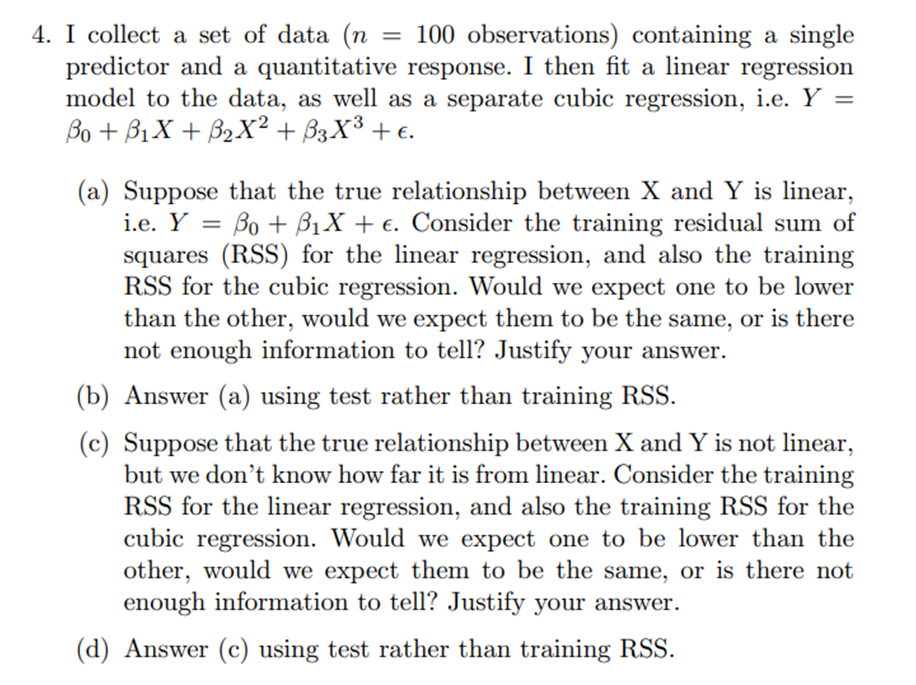

a)  
We expect RSS to be lower for the cubic regression than linear regression on train sets, because fitting higher-order polynomial coefficients gives the cubic model more degrees of freedom/flexibility, thus providing a tighter fit to data points.  
  
b)  
RSS would likely be higher in the cubic model than linear one when evaluating against a test set. The true relationship is linear, the cubic model would likely overfit to the data from the training set and thus the reduction in bias due to the higher degree of freedom afforded by the cubic model would be small (and offset by it's high variance in a true linear relationship) compared to the reduction in variance from a linear model fit.  
  
c)  
Cubic model will have lower RSS, because it has greater flexibility/more degrees of freedom than the linear model.   
  
d)  
We don't have information about the nature of the non-linearity, so it's hard to say which model would fare better. Cubic regression would do better if the true relationship is modelled better by a cubic model, and the opposite holds when linear models represent the true relationship better.